### Statistical Process Control

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statprocon import XmR

data = pd.read_csv("datasets/sla_spc_flowrate_channels_13batches.csv")

<Axes: >

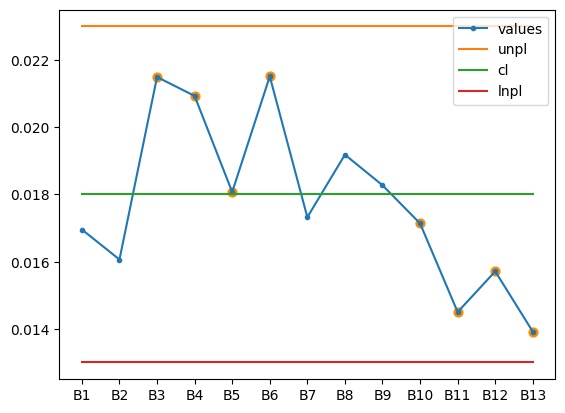

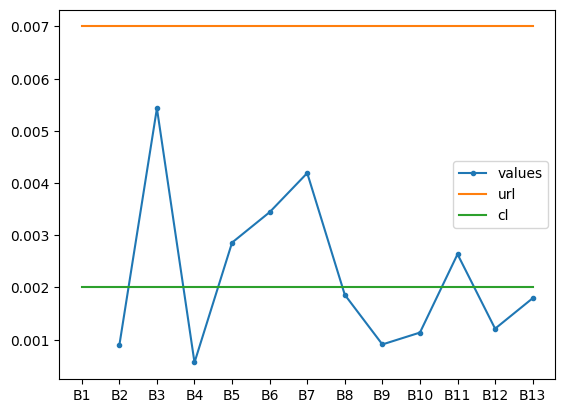

In [40]:
# compute cv mean and std, and residual drift data
batch_summary = data.groupby("batch_id").agg(
    flow_rate_mean=("flow_rate", "mean"),
    flow_rate_std=("flow_rate", "std"),
    resin_temp=("resin_temp", "mean"),
    resin_age=("resin_age", "first"),
    ambient_temp=("ambient_temp", "mean")
).reset_index()

batch_summary["flow_rate_cv"] = batch_summary["flow_rate_std"] / batch_summary["flow_rate_mean"]

cv_series = batch_summary["flow_rate_cv"]
labels = [f"B{i}" for i in batch_summary["batch_id"]]

xmr = XmR(cv_series) # analyzier
xmr.x_plot(pd, labels)    # individuals chart with flagged points
xmr.mr_plot(pd, labels) 